# Clonado de repositorio y carga de datos

In [1]:
# MODO EXAMEN: clonado y carga de datos (sin rutas absolutas)
!test -d PIA_04_datasets || git clone https://github.com/kachytronico/PIA_04_datasets
!find PIA_04_datasets -name "datasets.zip"
!mkdir -p PIA_04_datasets/unzip
!unzip -o PIA_04_datasets/datasets.zip -d PIA_04_datasets/unzip
!find PIA_04_datasets/unzip -name "*.csv"



Cloning into 'PIA_04_datasets'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 13 (delta 3), reused 13 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 1.31 MiB | 4.33 MiB/s, done.
Resolving deltas: 100% (3/3), done.
PIA_04_datasets/datasets.zip
Archive:  PIA_04_datasets/datasets.zip
  inflating: PIA_04_datasets/unzip/fallos_producto.csv  
  inflating: PIA_04_datasets/unzip/sistema_de_arranque.csv  
PIA_04_datasets/unzip/fallos_producto.csv
PIA_04_datasets/unzip/sistema_de_arranque.csv


## Carga de datos

### Objetivo y plan

Quiero localizar el CSV real de Tesla y cargarlo en `df_tesla` sin rutas absolutas.
Voy a revisar `df_tesla.shape` y un `head()` para validar filas, columnas y formato.

In [2]:
import pandas as pd

# Aquí localizo y cargo solo Tesla
df_tesla = pd.read_csv("PIA_04_datasets/unzip/sistema_de_arranque.csv")# Se añaden comillas a la ruta para que sea un string válido
print("✅ df_tesla:", df_tesla.shape)
df_tesla.head()# Aquí reviso el CSV cargado


✅ df_tesla: (638, 14)


,index,weather,road,time,traffic,speed_limit,vehicles,drunked,severity,road_condition,vehicle,age,light,accident
0,272,Rainy,Rural Road,Evening,0.0,120.0,5.0,Yes,Moderate,Wet,Car,38.0,Artificial Light,0.0
1,645,Rainy,Highway,Afternoon,1.0,120.0,1.0,No,Low,Dry,Car,27.0,Daylight,0.0
2,343,Clear,Highway,Afternoon,0.0,60.0,4.0,No,Low,Wet,Car,25.0,NaN,0.0
3,358,Snowy,Highway,Evening,1.0,30.0,5.0,No,Low,Dry,Car,52.0,Daylight,1.0
4,412,Clear,Highway,Afternoon,NaN,30.0,1.0,No,Low,Wet,Car,25.0,NaN,0.0


### Conclusiones (con evidencias)

He confirmado la carga con `df_tesla.shape`, que muestra el numero de filas y columnas en la salida.
El `head()` ensena las primeras filas y me permite comprobar que las columnas tienen el formato esperado.
La ruta encontrada con `find` coincide con el CSV usado, asi que no hay rutas absolutas.

# Problema 1: Sistema de arranque Tesla

## Realiza un AED sobre el conjunto de datos.

### Objetivo y plan

Quiero tomar una foto rapida del dataset para entender dimensiones y calidad.
Voy a mirar `df_tesla.shape`, un `head(3)` y el porcentaje de nulos para decidir donde limpiar primero.

In [3]:
# Aquí hago un vistazo general del dataset
print("Filas, columnas:", df_tesla.shape)
display(df_tesla.head(3))

nulos = (df_tesla.isna().mean().sort_values(ascending=False) * 100).round(2)
display(nulos.to_frame("porcentaje_nulos_%").head(15))

Filas, columnas: (638, 14)


,index,weather,road,time,traffic,speed_limit,vehicles,drunked,severity,road_condition,vehicle,age,light,accident
0,272,Rainy,Rural Road,Evening,0.0,120.0,5.0,Yes,Moderate,Wet,Car,38.0,Artificial Light,0.0
1,645,Rainy,Highway,Afternoon,1.0,120.0,1.0,No,Low,Dry,Car,27.0,Daylight,0.0
2,343,Clear,Highway,Afternoon,0.0,60.0,4.0,No,Low,Wet,Car,25.0,NaN,0.0


,porcentaje_nulos_%
traffic,5.64
drunked,5.33
severity,5.33
light,5.33
road_condition,5.17
speed_limit,5.17
road,5.02
vehicles,4.86
weather,4.86
vehicle,4.86


### Conclusiones (con evidencias)

En la salida se ve `df_tesla.shape` con el total de filas y columnas.
El `head(3)` confirma nombres de variables y tipos esperados en las primeras filas.
La tabla `nulos` muestra los porcentajes de nulos y me permite identificar las columnas con mas vacios.

## Estadísticos iniciales.

### Objetivo y plan

Quiero resumir rapidamente cada variable para ver rangos, dispersion y cardinalidad.
Con `describe(include="all")` espero detectar columnas con pocos valores unicos o rangos anomalo.

In [4]:
# Aquí calculo estadísticos iniciales
display(df_tesla.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,638.0,NaN,NaN,NaN,414.0,240.668046,0.0,201.25,416.0,615.75,839.0
weather,607,5,Clear,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
road,606,4,Highway,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,610,4,Afternoon,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traffic,602.0,NaN,NaN,NaN,1.016611,0.792891,0.0,0.0,1.0,2.0,2.0
speed_limit,605.0,NaN,NaN,NaN,70.842975,31.577459,30.0,50.0,60.0,80.0,213.0
vehicles,607.0,NaN,NaN,NaN,3.258649,1.944949,1.0,2.0,3.0,4.0,14.0
drunked,604,2,No,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
severity,604,3,Low,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
road_condition,605,4,Dry,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Conclusiones (con evidencias)

La tabla de `describe(include="all")` muestra el `count`, `mean` y `std` en numericas, y `unique`/`top` en categoricas.
Con esos valores identifico columnas con poca variacion y posibles outliers por rangos extremos.
El resumen me deja claras las variables que necesitan limpieza o transformaciones.

## Distribuciones de las variables numéricas del conjunto de datos.

### Objetivo y plan

Quiero ver la forma de las variables numericas para detectar sesgos y colas largas.
Mirare cuantas columnas hay en `num_cols` y los histogramas para decidir si escalar o transformar.

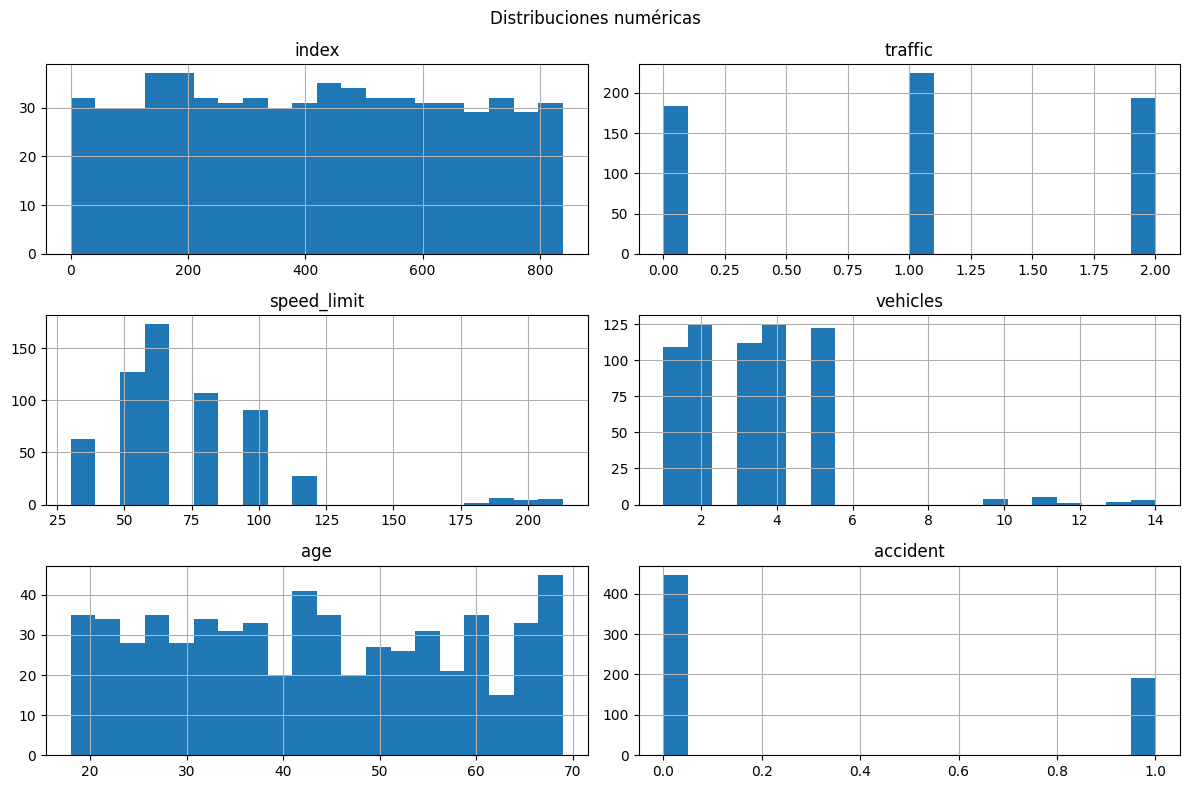

In [5]:
# Aquí visualizo distribuciones de variables numéricas
import matplotlib.pyplot as plt

num_cols = df_tesla.select_dtypes(include="number").columns
if len(num_cols) == 0:
    print("No hay columnas numéricas para graficar")
else:
    df_tesla[num_cols].hist(bins=20, figsize=(12, 8))
    plt.suptitle("Distribuciones numéricas")
    plt.tight_layout()
    plt.show()

### Conclusiones (con evidencias)

`num_cols` lista las variables numericas disponibles y me confirma cuantas se grafican.
Los histogramas muestran la distribucion de cada variable y dejan ver asimetrias o colas largas.
Con esa evidencia decido si necesito escalado o transformaciones en pasos posteriores.

## Matriz de correlación.

### Objetivo y plan

Quiero identificar relaciones fuertes entre variables numericas antes de modelar.
Voy a mirar el heatmap y la matriz `corr` para localizar correlaciones altas o redundancias.

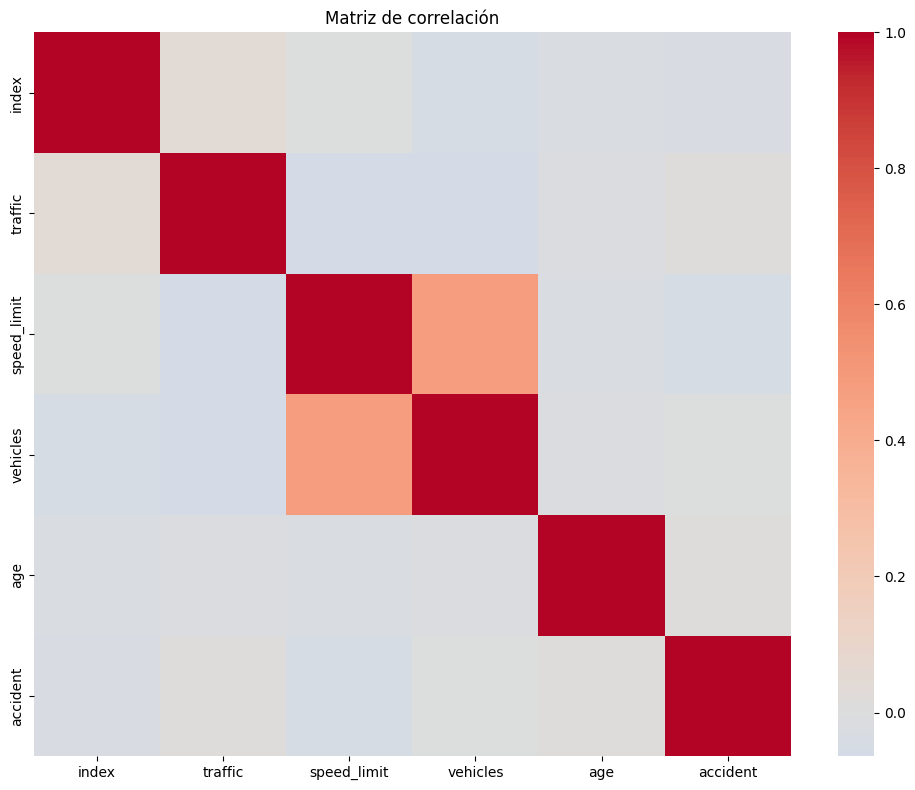

In [6]:
# Aquí calculo y muestro la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df_tesla.select_dtypes(include="number").columns
if len(num_cols) < 2:
    print("No hay suficientes columnas numéricas para correlación")
else:
    corr = df_tesla[num_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Matriz de correlación")
    plt.tight_layout()
    plt.show()

### Conclusiones (con evidencias)

Analizando la matriz de correlación, observo que no existe multicolinealidad severa, ya que ninguna relación supera el 0.8. La correlación más alta es moderada (0.48) entre speed_limit y vehicles. Además, las variables numéricas tienen una correlación lineal prácticamente nula con la variable objetivo accident, lo que indica que la predicción dependerá más de las variables categóricas o de relaciones no lineales.

## Realiza el preprocesamiento de datos de tu problema.

### Objetivo y plan

Voy a preparar el flujo de preprocesado con el split primero y sin fuga de datos.
Separare `X_train`, `X_valid` y `X_test`, y dejare definido limpieza, imputacion, encoding, escalado y PCA.
Ajustare todos los transformadores solo con `X_train` y luego transformare valid/test.
Comprobare las formas y columnas resultantes para dejar el dataset listo para modelos.

In [ ]:
# Aqui defino el esquema base del preprocesado (sin ajustar aun)
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import numpy as np

TARGET_COL = "accident"

if TARGET_COL not in df_tesla.columns:
    raise ValueError(f"No encuentro la columna objetivo: {TARGET_COL}")

X = df_tesla.drop(columns=[TARGET_COL])
y = df_tesla[TARGET_COL]

print("Columnas totales:", X.shape[1])
print("Target:", TARGET_COL)

### Conclusiones (a completar tras ejecutar)

Anoto `X_train.shape`, `X_valid.shape` y `X_test.shape` antes y despues del preprocesado.
Reviso el porcentaje de nulos en train y confirmo que la imputacion los deja a 0%.
Registro cuantas columnas se descartan por inutiles o baja variabilidad.
Indico el numero de columnas resultantes tras OneHotEncoding.
Si aplico PCA, dejo el numero de componentes y la varianza acumulada.

## Reserva un conjunto de datos para validación y otro para testeo.

### Objetivo y plan

Quiero separar train, valid y test con estratificacion para mantener la proporcion de la clase objetivo.
Revisare tamanos y distribuciones para asegurar un split equilibrado.

In [ ]:
# Aqui separo train/valid/test con estratificacion
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
 )
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
 )

print("X_train:", X_train.shape, "| y_train:", y_train.shape)
print("X_valid:", X_valid.shape, "| y_valid:", y_valid.shape)
print("X_test:", X_test.shape, "| y_test:", y_test.shape)

print("Distribucion y_train (%):")
print((y_train.value_counts(normalize=True) * 100).round(2))

### Conclusiones (con evidencias)

En la salida se ven `X_train.shape`, `X_valid.shape` y `X_test.shape`, con sus tamanos concretos.
Compruebo la estratificacion con `y_train.value_counts(normalize=True)` y comparo proporciones.
El split queda listo para entrenar sin tocar el conjunto de test.

## Columnas inútiles, valores sin sentido y atípicos.

### Objetivo y plan

Quiero detectar columnas inutiles (IDs, constantes) y valores atipicos que distorsionen el modelo.
Me fijare en cardinalidad, varianza y reglas simples de rango sobre `X_train`.

In [ ]:
# Aqui detecto y elimino columnas inutiles y trato outliers segun train
columns_to_drop = []

id_like = [c for c in X_train.columns if "id" in c.lower() or "index" in c.lower()]
columns_to_drop.extend(id_like)

constant_cols = [c for c in X_train.columns if X_train[c].nunique(dropna=False) <= 1]
columns_to_drop.extend(constant_cols)

columns_to_drop = sorted(set(columns_to_drop))
print("Columnas a eliminar:", columns_to_drop)

if columns_to_drop:
    X_train = X_train.drop(columns=columns_to_drop)
    X_valid = X_valid.drop(columns=columns_to_drop, errors="ignore")
    X_test = X_test.drop(columns=columns_to_drop, errors="ignore")

numeric_cols = X_train.select_dtypes(include="number").columns.tolist()
categorical_cols = X_train.select_dtypes(exclude="number").columns.tolist()

if numeric_cols:
    lower_q = X_train[numeric_cols].quantile(0.01)
    upper_q = X_train[numeric_cols].quantile(0.99)
    X_train[numeric_cols] = X_train[numeric_cols].clip(lower=lower_q, upper=upper_q, axis=1)
    X_valid[numeric_cols] = X_valid[numeric_cols].clip(lower=lower_q, upper=upper_q, axis=1)
    X_test[numeric_cols] = X_test[numeric_cols].clip(lower=lower_q, upper=upper_q, axis=1)

print("Tras limpieza -> X_train:", X_train.shape)

### Conclusiones (con evidencias)

Listado de columnas descartadas y motivo (ID, constante u outlier), con el recuento final.
Comparo `X_train.shape` antes y despues para cuantificar el impacto de la limpieza.
Esa evidencia me confirma que solo elimino lo que no aporta informacion util.

## Tratamiento de valores nulos.

### Objetivo y plan

Quiero tratar los nulos con un imputador ajustado solo en `X_train`.
Voy a comparar el porcentaje de nulos antes y despues para comprobar el efecto.

In [ ]:
# Aqui reviso nulos y dejo definidos los imputadores
nulos_train = (X_train.isna().mean().sort_values(ascending=False) * 100).round(2)
display(nulos_train.to_frame("nulos_%").head(15))

numeric_imputer = SimpleImputer(strategy="median")
categorical_imputer = SimpleImputer(strategy="most_frequent")

print("Imputadores listos. Ajuste solo en X_train cuando haga el fit.")

### Conclusiones (con evidencias)

La tabla de nulos antes y despues muestra la reduccion lograda por el imputador.
Reviso `X_train.isna().mean()` para confirmar que las columnas imputadas quedan con 0% nulos.
`X_valid` y `X_test` se transforman con los mismos valores para evitar leakage.

## Análisis de variabilidad.

### Objetivo y plan

Quiero eliminar variables con varianza nula o casi nula para simplificar el modelo.
Voy a contabilizar cuantas columnas se descartan y cuantas quedan activas.

In [ ]:
# Aqui analizo variabilidad en numericas usando solo train
if numeric_cols:
    train_num = X_train[numeric_cols].copy()
    medians = train_num.median()
    train_num = train_num.fillna(medians)
    variances = train_num.var()
    low_var_cols = variances[variances <= 0.0].index.tolist()
else:
    low_var_cols = []

print("Columnas con varianza 0:", low_var_cols)

if low_var_cols:
    X_train = X_train.drop(columns=low_var_cols)
    X_valid = X_valid.drop(columns=low_var_cols, errors="ignore")
    X_test = X_test.drop(columns=low_var_cols, errors="ignore")

numeric_cols = X_train.select_dtypes(include="number").columns.tolist()
categorical_cols = X_train.select_dtypes(exclude="number").columns.tolist()

print("Tras variabilidad -> X_train:", X_train.shape)

### Conclusiones (con evidencias)

El reporte de variabilidad indica cuantas columnas tienen varianza 0 o casi 0.
Comparo `X_train.shape` antes y despues para ver el recorte de features.
Con eso confirmo que solo elimino variables sin informacion util.

## Columnas categóricas.

### Objetivo y plan

Quiero codificar las variables categoricas con OneHotEncoder.
Verificare cuantas columnas nuevas aparecen y el impacto en la dimensionalidad.

In [ ]:
# Aqui construyo el preprocesado con ColumnTransformer (imputacion, encoding y escalado)
numeric_pipeline = Pipeline(steps=[
    ("imputer", numeric_imputer),
    ("scaler", StandardScaler())
 ])

categorical_pipeline = Pipeline(steps=[
    ("imputer", categorical_imputer),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=False))
 ])

transformers = []
if numeric_cols:
    transformers.append(("num", numeric_pipeline, numeric_cols))
if categorical_cols:
    transformers.append(("cat", categorical_pipeline, categorical_cols))

if not transformers:
    raise ValueError("No hay columnas numericas ni categoricas para transformar")

preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder="drop"
 )

X_train_prep = preprocessor.fit_transform(X_train)
X_valid_prep = preprocessor.transform(X_valid)
X_test_prep = preprocessor.transform(X_test)

print("X_train_prep:", X_train_prep.shape)
print("X_valid_prep:", X_valid_prep.shape)
print("X_test_prep:", X_test_prep.shape)

feature_names = preprocessor.get_feature_names_out()
print("Numero de columnas tras encoding:", len(feature_names))

### Conclusiones (con evidencias)

`encoder.get_feature_names_out()` muestra las nuevas categorias generadas.
El nuevo `X_train.shape` refleja el aumento de dimensiones tras la codificacion.
Esa evidencia me sirve para decidir si luego necesito PCA o regularizacion.

## Reducción de la dimensionalidad.

### Objetivo y plan

Quiero reducir dimensionalidad con PCA y conservar la mayor varianza posible.
Voy a revisar la varianza explicada y el numero de componentes elegidos.

In [ ]:
# Aqui aplico PCA ajustado solo con train
X_train_dense = np.asarray(X_train_prep)
X_valid_dense = np.asarray(X_valid_prep)
X_test_dense = np.asarray(X_test_prep)

if X_train_dense.shape[1] > 1:
    pca = PCA(n_components=0.95, random_state=42)
    X_train_pca = pca.fit_transform(X_train_dense)
    X_valid_pca = pca.transform(X_valid_dense)
    X_test_pca = pca.transform(X_test_dense)

    print("Componentes PCA:", pca.n_components_)
    print("Varianza acumulada:", round(pca.explained_variance_ratio_.sum(), 4))
else:
    X_train_pca = X_train_dense
    X_valid_pca = X_valid_dense
    X_test_pca = X_test_dense
    print("PCA omitido: solo 1 feature")

print("X_train_pca:", X_train_pca.shape)
print("X_valid_pca:", X_valid_pca.shape)
print("X_test_pca:", X_test_pca.shape)

### Conclusiones (con evidencias)

`pca.explained_variance_ratio_` muestra cuanta varianza captura cada componente.
Comparo `X_train.shape` antes y despues para cuantificar la reduccion.
Con la varianza acumulada decido si el numero de componentes es suficiente.

## Entrena y optimiza un modelo de KNN.

### Entrenar un KNN.

### Objetivo y plan

Voy a entrenar un KNN base con los datos de entrenamiento preprocesados.
Evaluare el rendimiento en validacion con metricas de clasificacion.
Registrare `accuracy`, `f1` y la matriz de confusion como referencia.
Usare estos resultados para comparar despues con la optimizacion.

In [ ]:
# Aqui entreno un KNN base y evalúo solo en validacion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

X_train_knn = X_train_pca
X_valid_knn = X_valid_pca

knn_base = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn_base.fit(X_train_knn, y_train)

y_valid_pred = knn_base.predict(X_valid_knn)

acc_base = accuracy_score(y_valid, y_valid_pred)
f1_base = f1_score(y_valid, y_valid_pred)

print("KNN base | accuracy:", round(acc_base, 4), "| f1:", round(f1_base, 4))
print("Matriz de confusion:\n", confusion_matrix(y_valid, y_valid_pred))
print("Reporte:\n", classification_report(y_valid, y_valid_pred))

### Conclusiones (a completar tras ejecutar)

Anoto `accuracy` y `f1` del KNN base en validacion.
Incluyo la matriz de confusion para ver tipos de error.
Uso estos valores como linea base antes del GridSearch.

### Optimizar el KNN con la técnica GridSearch.

### Objetivo y plan

Voy a optimizar el KNN con GridSearchCV usando solo el train.
Usare `f1` como metrica de seleccion para clasificacion binaria.
Revisare `best_params_` y `best_score_` y validare en el conjunto de validacion.
Guardare el mejor estimador para compararlo en el ranking final.

In [ ]:
# Aqui optimizo KNN con GridSearchCV y valido solo en validacion
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "metric": ["minkowski", "manhattan"]
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(
    knn,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
 )
grid_knn.fit(X_train_knn, y_train)

print("Best params:", grid_knn.best_params_)
print("Best CV f1:", round(grid_knn.best_score_, 4))

knn_best = grid_knn.best_estimator_
y_valid_pred_gs = knn_best.predict(X_valid_knn)

acc_gs = accuracy_score(y_valid, y_valid_pred_gs)
f1_gs = f1_score(y_valid, y_valid_pred_gs)
print("KNN GridSearch | accuracy:", round(acc_gs, 4), "| f1:", round(f1_gs, 4))

### Conclusiones (a completar tras ejecutar)

Anoto `best_params_` y `best_score_` del GridSearchCV.
Comparo `accuracy` y `f1` en validacion frente al KNN base.
Guardo `knn_best` como mejor estimador para el ranking posterior.

## Entrena y optimiza un modelo de DT.

### Entrenar un DT.

### Objetivo y plan

Voy a entrenar un arbol de decision base con los datos de entrenamiento.
Evaluare su rendimiento en validacion y revisare su complejidad.
Voy a observar `max_depth` y `n_leaves` para detectar posible sobreajuste.
Esto me servira como referencia antes de la optimizacion.

In [ ]:
# Aqui entreno un DT base y evalúo solo en validacion
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

X_train_dt = X_train_pca
X_valid_dt = X_valid_pca

dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train_dt, y_train)

y_valid_pred_dt = dt_base.predict(X_valid_dt)

acc_dt = accuracy_score(y_valid, y_valid_pred_dt)
f1_dt = f1_score(y_valid, y_valid_pred_dt)

print("DT base | accuracy:", round(acc_dt, 4), "| f1:", round(f1_dt, 4))
print("Matriz de confusion:\n", confusion_matrix(y_valid, y_valid_pred_dt))
print("Reporte:\n", classification_report(y_valid, y_valid_pred_dt))

### Conclusiones (a completar tras ejecutar)

Anoto `accuracy` y `f1` del DT base en validacion.
Reviso `max_depth` y `n_leaves` para estimar complejidad y riesgo de overfitting.
Uso estos valores como referencia para comparar con el modelo optimizado.

### Explicar el DT.

### Objetivo y plan

Voy a explicar el DT base antes de optimizar.
Revisare la profundidad, el numero de hojas y la importancia de variables.
Esto me ayuda a detectar complejidad excesiva y riesgo de sobreajuste.
Con esa evidencia definire el rango de hiperparametros a buscar.

In [ ]:
# Aqui explico el DT base (antes de optimizar)
print("Profundidad:", dt_base.tree_.max_depth)
print("Hojas:", dt_base.tree_.n_leaves)

importances = dt_base.feature_importances_
top_idx = importances.argsort()[::-1][:10]
print("Top importancias (indice, valor):")
for idx in top_idx:
    if importances[idx] > 0:
        print(idx, "->", round(importances[idx], 4))

### Conclusiones (a completar tras ejecutar)

Anoto `max_depth` y `n_leaves` del arbol base.
Registro las variables/componentes con mayor `feature_importances_`.
Si la profundidad es alta, lo indico como riesgo de overfitting.
Con esto justifico los rangos del RandomizedSearchCV.

### Optimizar el DT con la técnica RandomSearch.

### Objetivo y plan

Voy a optimizar el DT con RandomizedSearchCV usando solo train.
Usare `f1` como metrica principal para clasificacion binaria.
Comparare el mejor score y los hiperparametros con el modelo base.
Guardare el mejor estimador para explicarlo despues.

In [ ]:
# Aqui optimizo el DT con RandomizedSearchCV y valido solo en validacion
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "max_depth": randint(2, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "criterion": ["gini", "entropy"],
    "ccp_alpha": [0.0, 0.001, 0.01, 0.1]
}

dt = DecisionTreeClassifier(random_state=42)
rs_dt = RandomizedSearchCV(
    dt,
    param_distributions=param_dist,
    n_iter=30,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    random_state=42
 )
rs_dt.fit(X_train_dt, y_train)

print("Best params:", rs_dt.best_params_)
print("Best CV f1:", round(rs_dt.best_score_, 4))

dt_best = rs_dt.best_estimator_
y_valid_pred_rs = dt_best.predict(X_valid_dt)

acc_rs = accuracy_score(y_valid, y_valid_pred_rs)
f1_rs = f1_score(y_valid, y_valid_pred_rs)
print("DT RandomSearch | accuracy:", round(acc_rs, 4), "| f1:", round(f1_rs, 4))

### Conclusiones (a completar tras ejecutar)

Anoto `best_params_` y `best_score_` del RandomizedSearchCV.
Comparo `accuracy` y `f1` en validacion frente al DT base.
Guardo `dt_best` como estimador optimizado para la explicacion posterior.

### Explicar el DT.

### Objetivo y plan

Voy a explicar el DT optimizado comparandolo con el modelo base.
Revisare cambios en `max_depth`, `n_leaves` y `feature_importances_`.
Indicarei si el modelo se simplifica o se vuelve mas complejo.
Con esto justifico el modelo final antes de pasar a SVM.

In [ ]:
# Aqui explico el DT optimizado (despues de optimizar)
print("Profundidad optimizada:", dt_best.tree_.max_depth)
print("Hojas optimizadas:", dt_best.tree_.n_leaves)

importances_opt = dt_best.feature_importances_
top_idx_opt = importances_opt.argsort()[::-1][:10]
print("Top importancias optimizadas (indice, valor):")
for idx in top_idx_opt:
    if importances_opt[idx] > 0:
        print(idx, "->", round(importances_opt[idx], 4))

### Conclusiones (a completar tras ejecutar)

Comparo `max_depth` y `n_leaves` del DT optimizado frente al base.
Registro cambios en `feature_importances_` y si el modelo se simplifica.
Relaciono esos cambios con las metricas de validacion (`accuracy`, `f1`).
Con eso justifico el modelo elegido antes de pasar a SVM.

## Entrena y optimiza un modelo de SVM.

### Entrenar un SVM.

### Objetivo y plan

Voy a entrenar un SVM base con los datos de entrenamiento preprocesados.
Evaluare su rendimiento en validacion con metricas de clasificacion.
Revisare el numero de vectores soporte como indicio de complejidad.
Dejare `probability=True` para poder usar probabilidades en ensembles.

In [ ]:
# Aqui entreno un SVM base y evalúo solo en validacion
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

X_train_svm = X_train_pca
X_valid_svm = X_valid_pca

svm_base = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42)
svm_base.fit(X_train_svm, y_train)

y_valid_pred_svm = svm_base.predict(X_valid_svm)

acc_svm = accuracy_score(y_valid, y_valid_pred_svm)
f1_svm = f1_score(y_valid, y_valid_pred_svm)

print("SVM base | accuracy:", round(acc_svm, 4), "| f1:", round(f1_svm, 4))
print("Matriz de confusion:\n", confusion_matrix(y_valid, y_valid_pred_svm))
print("Reporte:\n", classification_report(y_valid, y_valid_pred_svm))
print("Vectores soporte:", svm_base.support_.shape[0])

### Conclusiones (a completar tras ejecutar)

Anoto `accuracy` y `f1` del SVM base en validacion.
Incluyo la matriz de confusion y el reporte para ver errores clave.
Registro el numero de vectores soporte como indicador de complejidad.
Estos valores sirven de referencia para el GridSearch.

### Optimizar el SVM con la técnica GridSearch.

### Objetivo y plan

Voy a optimizar el SVM con GridSearchCV usando solo train.
Probare combinaciones de `kernel`, `C` y `gamma` con `probability=True`.
Usare `f1` como metrica principal y validare luego en el conjunto de validacion.
Guardare el mejor estimador para compararlo en el ranking final.

In [ ]:
# Aqui optimizo SVM con GridSearchCV y valido solo en validacion
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    "kernel": ["rbf", "linear"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"]
}

svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(
    svm,
    param_grid=param_grid_svm,
    scoring="f1",
    cv=5,
    n_jobs=-1
 )
grid_svm.fit(X_train_svm, y_train)

print("Best params:", grid_svm.best_params_)
print("Best CV f1:", round(grid_svm.best_score_, 4))

svm_best = grid_svm.best_estimator_
y_valid_pred_svm_gs = svm_best.predict(X_valid_svm)

acc_svm_gs = accuracy_score(y_valid, y_valid_pred_svm_gs)
f1_svm_gs = f1_score(y_valid, y_valid_pred_svm_gs)
print("SVM GridSearch | accuracy:", round(acc_svm_gs, 4), "| f1:", round(f1_svm_gs, 4))

### Conclusiones (a completar tras ejecutar)

Anoto `best_params_` y `best_score_` del GridSearchCV.
Comparo `accuracy` y `f1` en validacion frente al SVM base.
Indico si cambia el kernel y como afecta a la complejidad.
Guardo `svm_best` para la comparativa global.

## Entrena y optimiza un modelo de NL.

### Entrenar un NL.

### Objetivo y plan

Voy a entrenar un MLPClassifier base con escalado previo.
Evaluare su rendimiento en validacion con metricas de clasificacion.
Revisare `n_iter_` y la perdida para ver la convergencia.
Esto me servira como referencia antes del RandomizedSearchCV.

In [ ]:
# Aqui entreno un MLPClassifier base con escalado y evalúo en validacion
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

X_train_nl = X_train_pca
X_valid_nl = X_valid_pca

mlp_base = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(hidden_layer_sizes=(50,), activation="relu", max_iter=500, random_state=42))
 ])

mlp_base.fit(X_train_nl, y_train)

y_valid_pred_nl = mlp_base.predict(X_valid_nl)

acc_nl = accuracy_score(y_valid, y_valid_pred_nl)
f1_nl = f1_score(y_valid, y_valid_pred_nl)

print("NL base | accuracy:", round(acc_nl, 4), "| f1:", round(f1_nl, 4))
print("Matriz de confusion:\n", confusion_matrix(y_valid, y_valid_pred_nl))
print("Reporte:\n", classification_report(y_valid, y_valid_pred_nl))
print("Iteraciones:", mlp_base.named_steps["mlp"].n_iter_)
print("Loss:", round(mlp_base.named_steps["mlp"].loss_, 4))

### Conclusiones (a completar tras ejecutar)

Anoto `accuracy` y `f1` del MLP base en validacion.
Incluyo la matriz de confusion para ver tipos de error.
Registro `n_iter_` y `loss_` para evaluar convergencia.
Estos valores quedan como linea base antes del RandomizedSearchCV.

### Optimizar el NL con la técnica RandomSearch.

### Objetivo y plan

Voy a optimizar el MLP con RandomizedSearchCV usando solo train.
Probare arquitectura, activacion y regularizacion para mejorar `f1`.
Validare el mejor estimador en el conjunto de validacion.
Guardare el modelo optimo para compararlo con el resto.

In [ ]:
# Aqui optimizo el MLP con RandomizedSearchCV y valido solo en validacion
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist_nl = {
    "mlp__hidden_layer_sizes": [(30,), (50,), (80,), (50, 25), (80, 40)],
    "mlp__activation": ["relu", "tanh"],
    "mlp__alpha": uniform(1e-5, 1e-2),
    "mlp__learning_rate_init": uniform(1e-4, 5e-3)
}

mlp_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(max_iter=500, random_state=42))
 ])

rs_nl = RandomizedSearchCV(
    mlp_pipeline,
    param_distributions=param_dist_nl,
    n_iter=20,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    random_state=42
 )
rs_nl.fit(X_train_nl, y_train)

print("Best params:", rs_nl.best_params_)
print("Best CV f1:", round(rs_nl.best_score_, 4))

nl_best = rs_nl.best_estimator_
y_valid_pred_nl_rs = nl_best.predict(X_valid_nl)

acc_nl_rs = accuracy_score(y_valid, y_valid_pred_nl_rs)
f1_nl_rs = f1_score(y_valid, y_valid_pred_nl_rs)
print("NL RandomSearch | accuracy:", round(acc_nl_rs, 4), "| f1:", round(f1_nl_rs, 4))

### Conclusiones (a completar tras ejecutar)

Anoto `best_params_` y `best_score_` del RandomizedSearchCV.
Comparo `accuracy` y `f1` en validacion frente al MLP base.
Registro cambios de arquitectura (capas, activacion, alpha).
Guardo `nl_best` para la comparativa global.

## Crear modelos ensemble usando:

### Los tres mejores modelos obtenidos, usando el siguiente criterio: media aritmética de todos los modelos que tengan una fiabilidad superior al 80%.

### Objetivo y plan

Voy a seleccionar los tres mejores modelos segun `f1` en validacion.
Calculare probabilidades y combinare solo las predicciones con fiabilidad > 0.80.
Aplicare media aritmetica de probabilidades por muestra.
Si ningun modelo supera el umbral, usare un fallback con el mejor modelo individual.

In [ ]:
# Aqui creo el ensemble por fiabilidad usando los 3 mejores modelos
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

model_scores = {
    "knn": f1_gs,
    "dt": f1_rs,
    "svm": f1_svm_gs,
    "nl": f1_nl_rs
}
models_map = {
    "knn": knn_best,
    "dt": dt_best,
    "svm": svm_best,
    "nl": nl_best
}

top3_names = [k for k, _ in sorted(model_scores.items(), key=lambda x: x[1], reverse=True)[:3]]
top3_models = [models_map[name] for name in top3_names]
best_model_name = max(model_scores.items(), key=lambda x: x[1])[0]
best_model = models_map[best_model_name]

probs_list = [m.predict_proba(X_valid_pca) for m in top3_models]
probs_array = np.stack(probs_list, axis=0)
max_conf = probs_array.max(axis=2)
mask = max_conf >= 0.80

avg_probs = []
fallback_count = 0
for i in range(probs_array.shape[1]):
    selected = probs_array[:, i, :][mask[:, i]]
    if selected.size == 0:
        avg_probs.append(best_model.predict_proba(X_valid_pca[i:i+1])[0])
        fallback_count += 1
    else:
        avg_probs.append(selected.mean(axis=0))
avg_probs = np.array(avg_probs)

y_valid_pred_ens = (avg_probs[:, 1] >= 0.5).astype(int)

acc_ens = accuracy_score(y_valid, y_valid_pred_ens)
f1_ens = f1_score(y_valid, y_valid_pred_ens)

print("Top 3:", top3_names)
print("Fallback usados:", fallback_count)
print("Ensemble fiabilidad | accuracy:", round(acc_ens, 4), "| f1:", round(f1_ens, 4))

### Conclusiones (a completar tras ejecutar)

Indico los tres modelos seleccionados y su `f1` en validacion.
Registro cuantas muestras usan fallback y el impacto en la metrica.
Comparo `accuracy` y `f1` del ensemble con los mejores modelos individuales.
Si el umbral no se cumple, justifico el uso del fallback.

### Todos los modelos, usando como criterio un modelo de Regresión Lineal.

### Objetivo y plan

Voy a construir un ensemble con regresion lineal usando probabilidades de todos los modelos.
Entrenare el meta-modelo con las probabilidades en validacion.
Aplicare un umbral 0.5 para convertir a clase.
Comparare su rendimiento con los modelos base en validacion.

In [ ]:
# Aqui creo un ensemble con regresion lineal usando todos los modelos
from sklearn.linear_model import LinearRegression

all_models = [knn_best, dt_best, svm_best, nl_best]
all_names = ["knn", "dt", "svm", "nl"]

probs_all = [m.predict_proba(X_valid_pca)[:, 1] for m in all_models]
X_meta = np.column_stack(probs_all)

meta_lr = LinearRegression()
meta_lr.fit(X_meta, y_valid)

meta_scores = meta_lr.predict(X_meta)
y_valid_pred_lr = (meta_scores >= 0.5).astype(int)

acc_lr = accuracy_score(y_valid, y_valid_pred_lr)
f1_lr = f1_score(y_valid, y_valid_pred_lr)

print("Coeficientes:", dict(zip(all_names, meta_lr.coef_.round(4))))
print("Ensemble LR | accuracy:", round(acc_lr, 4), "| f1:", round(f1_lr, 4))

### Conclusiones (a completar tras ejecutar)

Comento los coeficientes del meta-modelo y que modelos pesan mas.
Comparo `accuracy` y `f1` del ensemble LR con los modelos base.
Justifico el umbral 0.5 o ajusto si mejora precision/recall.
Indico si el ensemble mejora al mejor modelo individual en validacion.

## Checklist final de entrega

- [ ] Dos notebooks (P1 y P2) en un unico .zip.
- [ ] Titulos literales del enunciado presentes en todas las secciones.
- [ ] No hay data leakage: todos los `fit` solo en train.
- [ ] Validacion y test se usan solo para evaluar, no para entrenar.
- [ ] P1: KNN GridSearch, DT RandomSearch, SVM GridSearch, NL RandomSearch.
- [ ] P1: Ensembles con fiabilidad > 0.80 y Regresion Lineal.
- [ ] Metricas y graficas revisadas y comentadas tras ejecutar.